In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [335]:
sns.set_style("darkgrid")

In [183]:
house_df = pd.read_csv("housing-classification-iter-0-2\housing-classification-iter-0-2.csv")

### Explore & clean the data

In [184]:
house_df.shape

(1460, 10)

In [185]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [186]:
house_df.sample(10)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
979,8816,80.0,1121,3,0,0,2,0,0,0
464,8430,60.0,1040,3,0,0,0,0,0,0
1377,10998,60.0,984,3,0,0,2,0,0,0
357,4224,44.0,1142,3,1,0,2,536,0,0
69,15593,81.0,1304,3,1,0,2,0,0,0
33,10552,70.0,1398,4,1,0,2,0,0,0
381,7200,60.0,1293,2,1,0,2,216,0,0
1105,12256,98.0,1463,3,2,0,2,186,0,1
1023,3182,43.0,1346,2,1,0,2,156,0,0
914,3000,30.0,612,2,0,0,2,0,0,0


In [187]:
house_df.loc[house_df.PoolArea != 0]

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
197,25419,174.0,1360,4,1,512,2,0,0,0
810,10140,78.0,1040,3,1,648,2,265,0,0
1170,9880,76.0,1096,3,1,576,1,203,0,0
1182,15623,160.0,2396,4,2,555,3,171,0,1
1298,63887,313.0,6110,3,3,480,2,214,0,0
1386,16692,80.0,1392,5,2,519,2,0,440,0
1423,19690,NaN,697,4,1,738,2,586,0,1


In [188]:
house_c_df = house_df.drop(columns="PoolArea").copy()

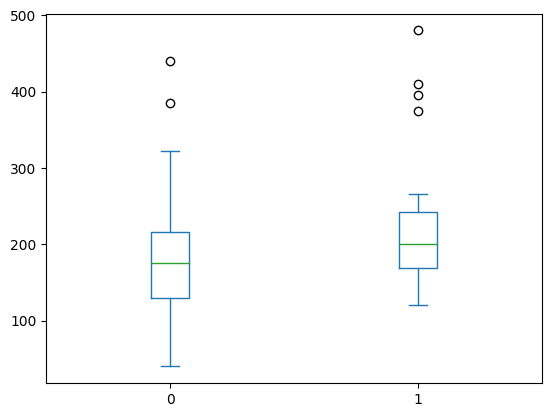

In [189]:
house_df.loc[house_c_df.ScreenPorch !=0 ].pivot(columns="Expensive",values="ScreenPorch").plot(kind="box");

#Hence there is no real corelation between Expensive and ScreenPorch value.. Eliminate it!

In [190]:
house_c_df = house_c_df.drop(columns="ScreenPorch")

In [191]:
round(house_c_df.describe(),1)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,Expensive
count,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,10516.8,70.0,1057.4,2.9,0.6,1.8,94.2,0.1
std,9981.3,24.3,438.7,0.8,0.6,0.7,125.3,0.4
min,1300.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7553.5,59.0,795.8,2.0,0.0,1.0,0.0,0.0
50%,9478.5,69.0,991.5,3.0,1.0,2.0,0.0,0.0
75%,11601.5,80.0,1298.2,3.0,1.0,2.0,168.0,0.0
max,215245.0,313.0,6110.0,8.0,3.0,4.0,857.0,1.0


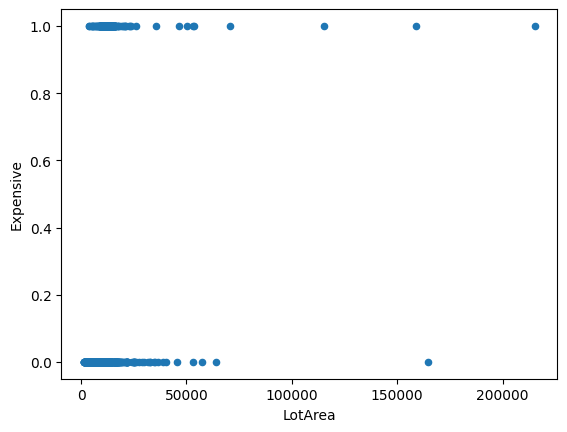

In [192]:
house_df.plot(kind="scatter",y="Expensive",x="LotArea");
#Hence there is no real corelation between Expensive and ScreenPorch value.. Eliminate it!

### Data pre-processing.

#### Split

In [193]:
X = house_c_df.drop(columns=["Expensive"]).copy()
y = house_c_df.pop("Expensive")

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=272)

In [195]:
X_train.shape[0]/house_c_df.shape[0]

0.7

### Imutate 

In [196]:
X_train.isna().sum()

LotArea           0
LotFrontage     183
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
GarageCars        0
WoodDeckSF        0
dtype: int64

In [197]:
X_train.LotFrontage.median()

69.0

In [198]:
from sklearn import impute

my_imputer = impute.SimpleImputer(strategy="median").set_output(transform = "pandas")
my_imputer.fit(X_train)

SimpleImputer(strategy='median')

In [199]:
my_imputer.strategy

'median'

In [200]:
X_train = my_imputer.transform(X_train)
X_test = my_imputer.transform(X_test)

In [201]:
X_train.isna().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
GarageCars      0
WoodDeckSF      0
dtype: int64

In [202]:
round(X_train.describe(),1)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF
count,1022.0,1022.0,1022.0,1022.0,1022.0,1022.0,1022.0
mean,10277.9,69.9,1049.0,2.9,0.6,1.8,100.8
std,7848.2,21.8,427.4,0.8,0.6,0.8,131.6
min,1477.0,21.0,0.0,0.0,0.0,0.0,0.0
25%,7685.8,60.0,785.0,2.0,0.0,1.0,0.0
50%,9468.5,69.0,977.0,3.0,1.0,2.0,0.0
75%,11467.0,79.0,1277.8,3.0,1.0,2.0,174.5
max,164660.0,313.0,3200.0,8.0,3.0,4.0,857.0


### Modelling (Dummy0)
Assume all houses are cheap!

In [238]:
X_train["is_Exp"] = 0
y_train_pred = X_train.pop("is_Exp") 

X_test["is_Exp"] = 0
y_test_pred = X_test.pop("is_Exp") 

#### Error Analysis

In [239]:
train_acc = accuracy_score(y_true = y_train, y_pred= y_train_pred)
round(train_acc,3)

0.852

In [240]:
test_acc = accuracy_score(y_true = y_test, y_pred= y_test_pred)
round(test_acc,3)

0.849

### Modelling (Dummy1)

Dummy Model : LotArea > 40000 then Expensive

In [249]:
LOT_AREA_THRESHOD = 50000

In [250]:
X_train["is_Exp"] = 0
X_train.loc[X_train.LotArea > LOT_AREA_THRESHOD,"is_Exp"] = 1
y_train_pred = X_train.pop("is_Exp") 

X_test["is_Exp"] = 0
X_test.loc[X_test.LotArea > LOT_AREA_THRESHOD,"is_Exp"] = 1
y_test_pred = X_test.pop("is_Exp") 

#### Error Analysis

In [251]:
train_acc = accuracy_score(y_true = y_train, y_pred= y_train_pred)
round(train_acc,3)

0.853

In [252]:
test_acc = accuracy_score(y_true = y_test, y_pred= y_test_pred)
round(test_acc,3)

0.854

### Modelling (Dummy2)

Dummy Model : LotArea > 40000  and GarageCars >2 then Expensive

In [233]:
LOT_AREA_THRESHOD = 40000
FIRE_PLACE = 3

In [234]:
X_train["is_Exp"] = 0
X_train.loc[(X_train.Fireplaces > FIRE_PLACE),"is_Exp"] = 1
y_train_pred = X_train.pop("is_Exp") 

X_test["is_Exp"] = 0
X_test.loc[(X_test.Fireplaces > FIRE_PLACE),"is_Exp"] = 1
y_test_pred = X_test.pop("is_Exp") 

#### Error Analysis

In [235]:
train_acc = accuracy_score(y_true = y_train, y_pred= y_train_pred)
round(train_acc,3)

0.852

In [236]:
test_acc = accuracy_score(y_true = y_test, y_pred= y_test_pred)
round(test_acc,3)

0.849

### Modelling (DecisionTree with defaults) 


In [254]:
from sklearn.tree import DecisionTreeClassifier

In [256]:
my_tree = DecisionTreeClassifier()
my_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [262]:
my_tree.get_depth()

17

In [265]:
my_tree.get_n_leaves()

86

In [266]:
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

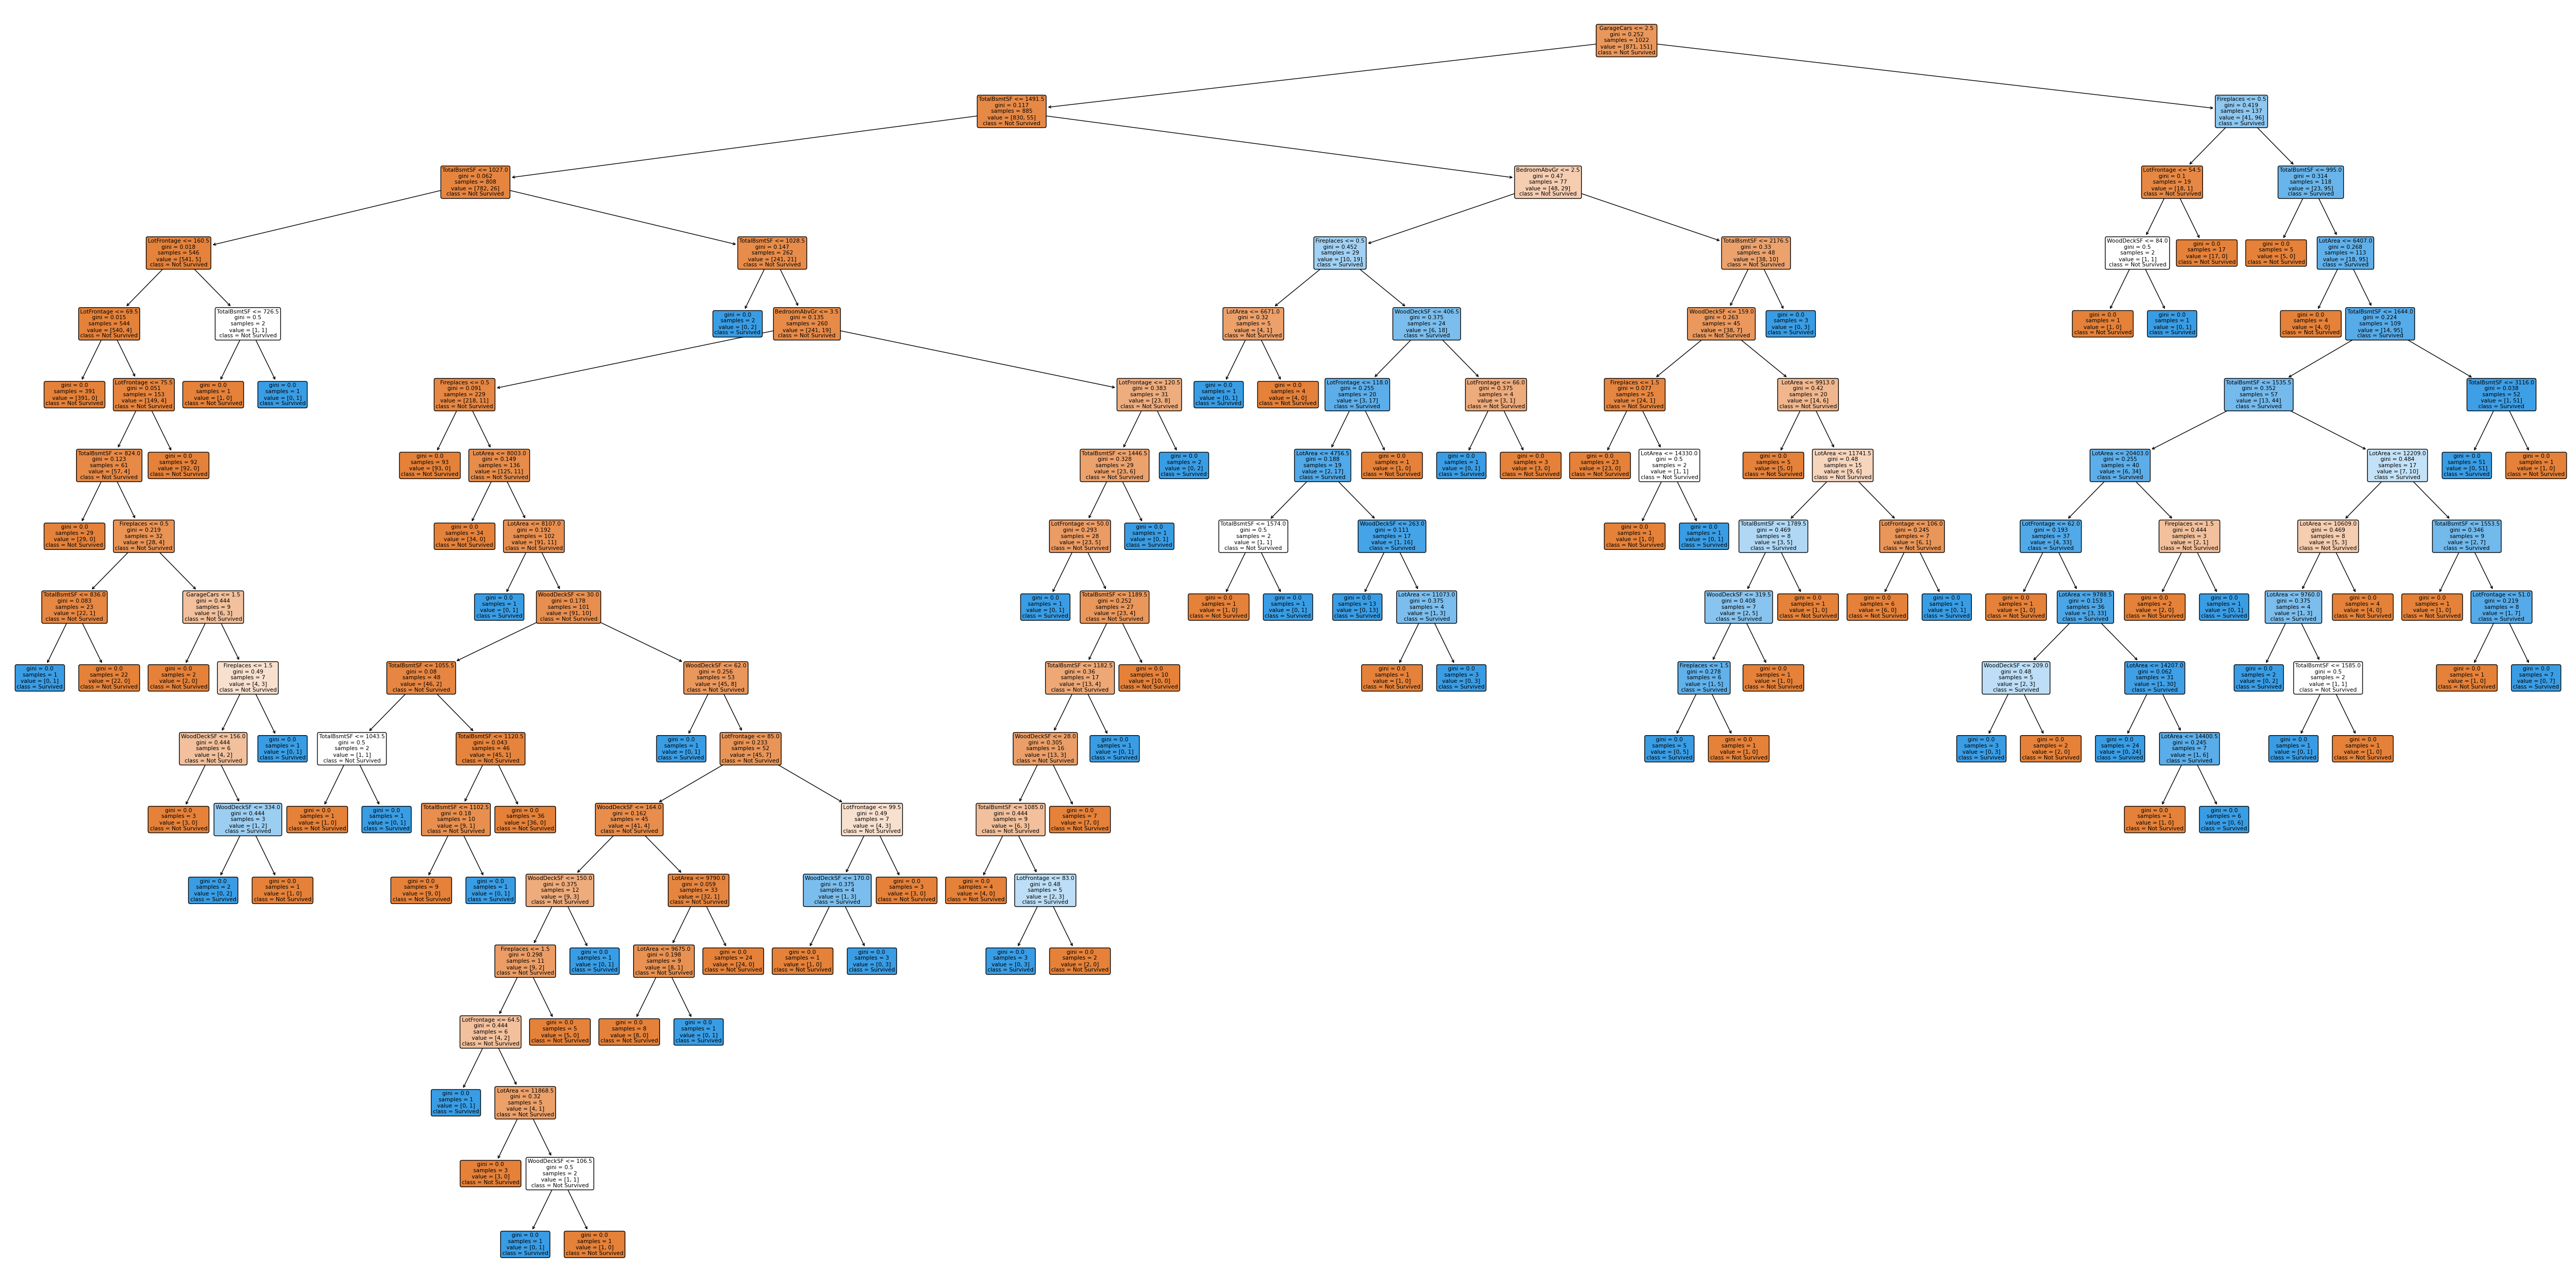

In [264]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Survived','Survived'], 
     feature_names=X_train.columns
     );

#### Error Analysis

In [ ]:
y_train_pred_tree = my_tree.predict(X_train)

In [268]:
accuracy_score(y_true = y_train,y_pred = y_train_pred_tree)

1.0

In [270]:
y_test_pred_tree = my_tree.predict(X_test)

In [271]:
accuracy_score(y_true = y_test,y_pred = y_test_pred_tree)

0.8721461187214612

### Modelling (DecisionTree with max_depth range) 


#### Try out with 1 depth

In [397]:
my_tree = DecisionTreeClassifier(max_depth=3)
my_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

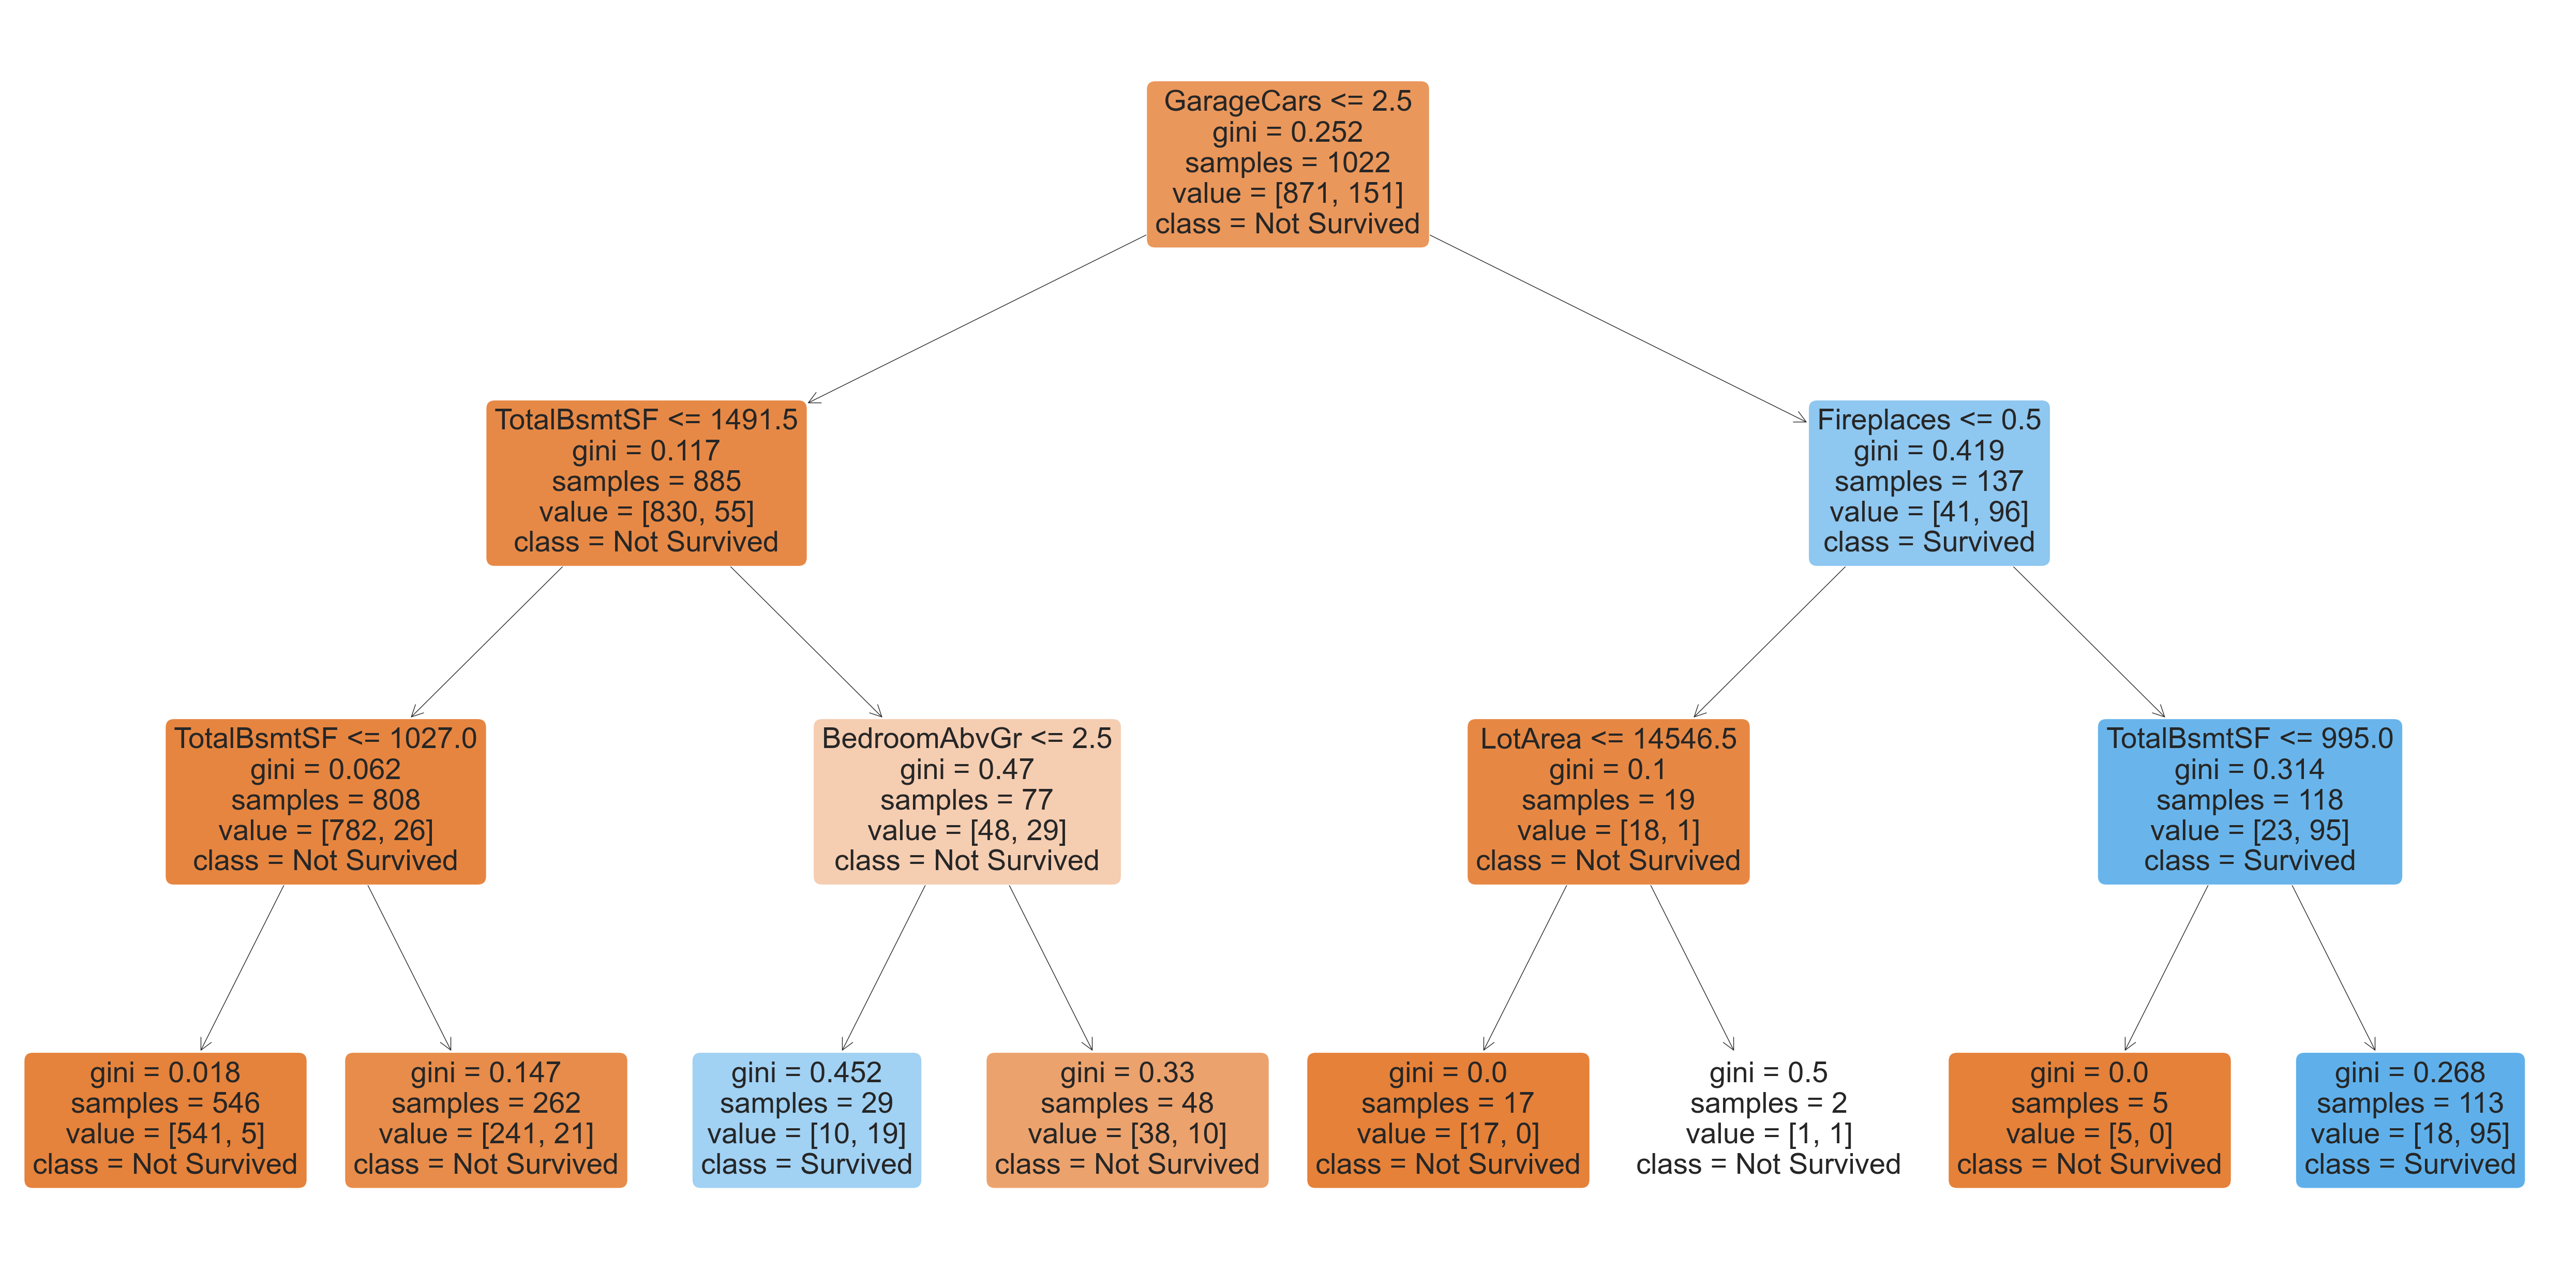

In [398]:

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Survived','Survived'], 
     feature_names=X_train.columns
     );

In [399]:
y_train_pred_tree = my_tree.predict(X_train)
y_test_pred_tree = my_tree.predict(X_test)

In [400]:
accuracy_score(y_true = y_train,y_pred = y_train_pred_tree)

0.9363992172211351

In [401]:
accuracy_score(y_true = y_test,y_pred = y_test_pred_tree)

0.9018264840182648

#### Try out with depth range

In [379]:
DEPTH_MIN,DEPTH_MAX = 1,25
train_acc_l = []
test_acc_l = []
for depth in range (DEPTH_MIN,DEPTH_MAX):
    my_tree = DecisionTreeClassifier(max_depth=depth,random_state=123)
    my_tree.fit(X_train,y_train)
    y_train_pred_tree = my_tree.predict(X_train)
    y_test_pred_tree = my_tree.predict(X_test)
    train_acc_l.append(accuracy_score(y_true = y_train,y_pred = y_train_pred_tree))
    test_acc_l.append(accuracy_score(y_true = y_test,y_pred = y_test_pred_tree))

In [380]:
difference = [train_acc_l[i]-test_acc_l[i] for i in range(DEPTH_MAX-DEPTH_MIN)]
min(difference)

0.017938682322243937

<AxesSubplot:>

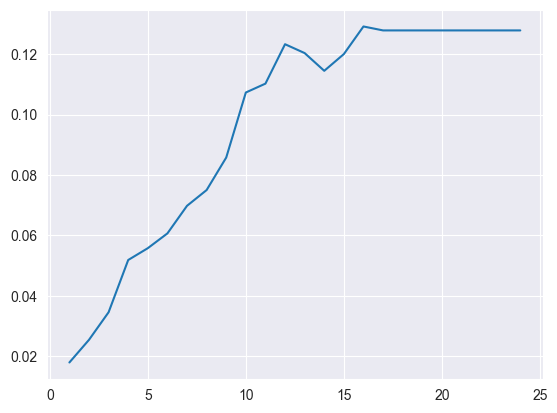

In [381]:

sns.lineplot(x=range(DEPTH_MIN,DEPTH_MAX),y=difference,markers="o")

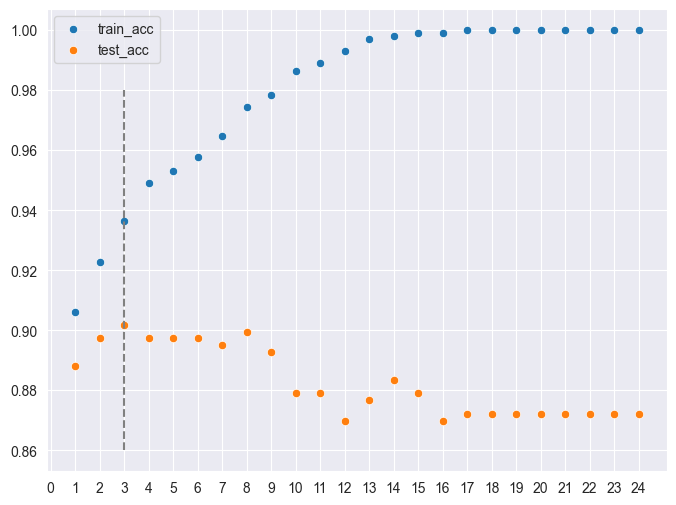

In [406]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=range(DEPTH_MIN,DEPTH_MAX),y=train_acc_l,label="train_acc")
sns.scatterplot(x=range(DEPTH_MIN,DEPTH_MAX),y=test_acc_l,label="test_acc")
plt.xticks(range(0,25));
plt.vlines(3,0.86,0.98,"grey",linestyles="dashed")

#### Try out with 1 min_samples_leaf

In [432]:
my_tree_samples = DecisionTreeClassifier(min_samples_leaf=200)
my_tree_samples.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=200)

In [433]:
my_tree_samples.get_depth()

3

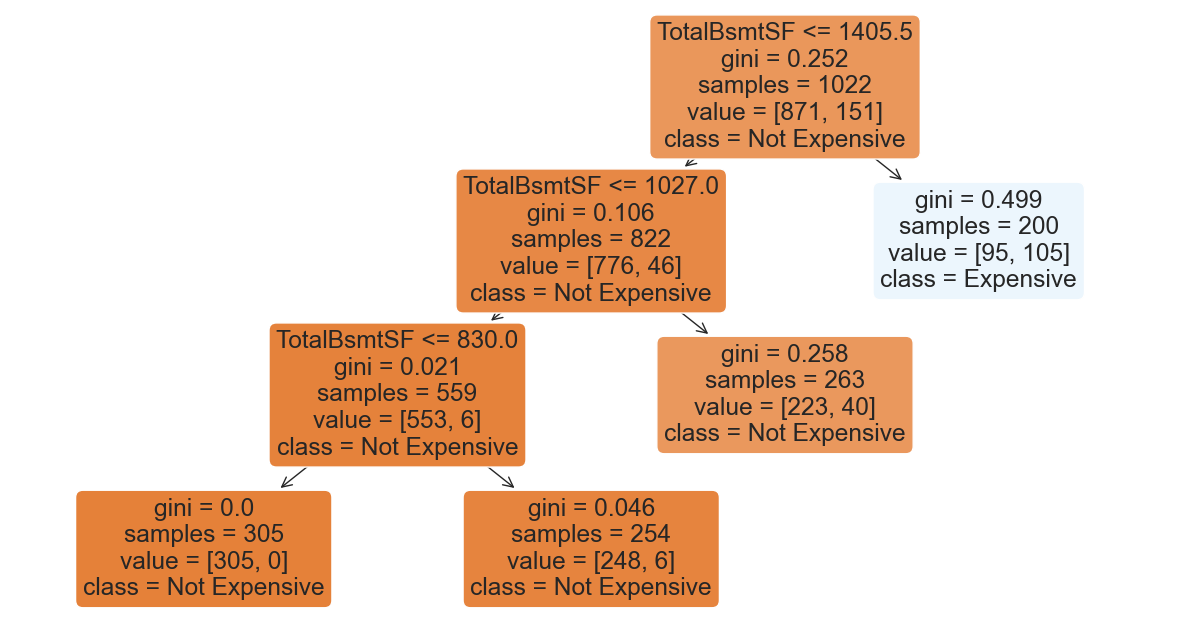

In [434]:
plt.figure(figsize=(15,8))
plot_tree(my_tree_samples,
        filled=True, 
        rounded=True, 
        class_names=['Not Expensive','Expensive'], 
        feature_names=X_train.columns
        );

In [435]:
y_train_pred_tree = my_tree.predict(X_train)
y_test_pred_tree = my_tree.predict(X_test)

In [436]:
accuracy_score(y_true = y_train,y_pred = y_train_pred_tree)

1.0

In [437]:
accuracy_score(y_true = y_test,y_pred = y_test_pred_tree)

0.8721461187214612

#### Try out with min_samples_leaf

In [407]:
SAMPLE_LEAF_MIN,SAMPLE_LEAF_MAX = 5,25
train_acc_l = []
test_acc_l = []
for depth in range (SAMPLE_LEAF_MIN,SAMPLE_LEAF_MAX):
    my_tree = DecisionTreeClassifier(max_depth=depth,random_state=123)
    my_tree.fit(X_train,y_train)
    y_train_pred_tree = my_tree.predict(X_train)
    y_test_pred_tree = my_tree.predict(X_test)
    train_acc_l.append(accuracy_score(y_true = y_train,y_pred = y_train_pred_tree))
    test_acc_l.append(accuracy_score(y_true = y_test,y_pred = y_test_pred_tree))

In [408]:
difference = [train_acc_l[i]-test_acc_l[i] for i in range(SAMPLE_LEAF_MAX - SAMPLE_LEAF_MIN)]
min(difference)

0.05577299412915848

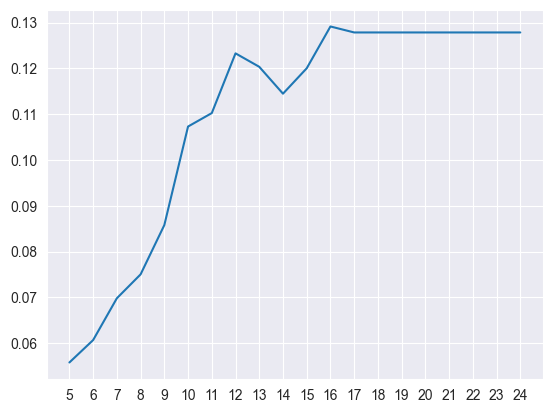

In [409]:

sns.lineplot(x=range(SAMPLE_LEAF_MIN,SAMPLE_LEAF_MAX),y=difference,markers="o")
plt.xticks(range(SAMPLE_LEAF_MIN,SAMPLE_LEAF_MAX));

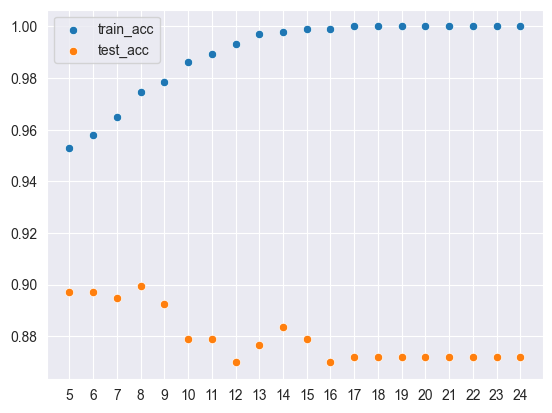

In [410]:
sns.scatterplot(x=range(SAMPLE_LEAF_MIN,SAMPLE_LEAF_MAX),y=train_acc_l,label="train_acc")
sns.scatterplot(x=range(SAMPLE_LEAF_MIN,SAMPLE_LEAF_MAX),y=test_acc_l,label="test_acc")
plt.xticks(range(SAMPLE_LEAF_MIN,SAMPLE_LEAF_MAX));